In [1]:
import pandas as pd
import numpy as np

## 1번 ~ 2번 문제

- 붓꽃 데이터 활용
(지난 주와 동일한 데이터, 다른 형태)

In [2]:
# 데이터 불러오기
import seaborn as sns
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 1. 지난주 4번 문제에서 구한 꽃잎의 가중평균을 새로운 열로 추가하고, 해당 열을 기준으로 내림차순 정렬하고, 첫 5행만 출력하시오.

In [21]:
def weighted_average(data):
    weight = [0.3,0.2,0.25,0.25]
    return np.dot(data, weight)

# 위 함수는 바꾸지 말고
# 밑에 코드 작성

# 새로운 열 추가  # 데이터프레임 iris에 'weighted_average' 라는 새 열을 추가. # iloc[:, :4] 각 행, 첫 네열 
iris['weighted_average'] = iris.iloc[:, :4].apply(weighted_average, axis=1) 

# weighted_average 기준으로 내림차순 정렬
iris_sorted = iris.sort_values(by='weighted_average', ascending=False)

# 첫 5행 출력
result = iris_sorted.head()
print(result)

     sepal_length  sepal_width  petal_length  petal_width    species  \
117           7.7          3.8           6.7          2.2  virginica   
131           7.9          3.8           6.4          2.0  virginica   
118           7.7          2.6           6.9          2.3  virginica   
105           7.6          3.0           6.6          2.1  virginica   
122           7.7          2.8           6.7          2.0  virginica   

     weighted_average  
117             5.295  
131             5.230  
118             5.130  
105             5.055  
122             5.045  


- 정답

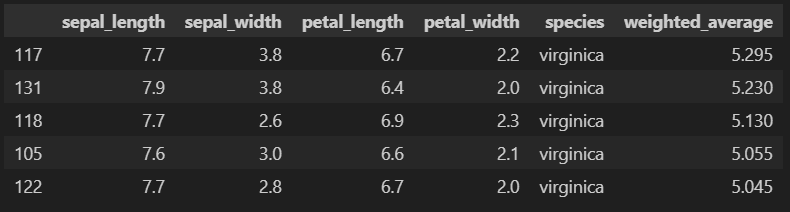

### 2. 붓꽃 데이터에서 붓꽃 종(species)별로 꽃받침(sepal) 길이, 꽃받침 폭, 꽃잎(petal) 길이, 꽃잎 폭의 평균을 구하라. 만약 붓꽃 종이 표시되지 않았을 때 이 수치들을 이용하여 붓꽃 종을 찾아낼 수 있을지 생각하고, 밑에 마크다운으로 작성 (연습문제 4.7.2)



In [16]:
# 밑에 코드 작성
# 데이터 불러오기
iris = sns.load_dataset("iris")

# 붓꽃 종(species)별로 꽃받침(sepal) 길이, 꽃받침 폭, 꽃잎(petal) 길이, 꽃잎 폭의 평균 계산
averages_by_species = iris.groupby('species').mean()

print(averages_by_species)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


- 정답

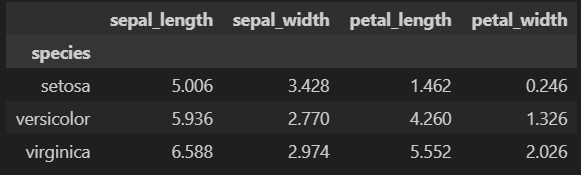

## 3번 ~ 5번 문제

- 이전 시즌의 클럽 축구 경기 데이터 활용
- 컬럼 명세서 : https://github.com/fivethirtyeight/data/tree/master/soccer-spi

In [17]:
## 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/minsuk1003/Python_DA_Study/main/Week%202/spi_matches_latest.csv")
df.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2019,2019-03-01,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,0.5755,0.1740,...,45.9,22.1,1.0,0.0,1.39,0.26,2.05,0.54,1.05,0.00
1,2019,2019-03-01,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,0.2387,0.5203,...,25.6,63.4,0.0,4.0,0.57,2.76,0.80,1.50,0.00,3.26
2,2019,2019-03-01,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,0.7832,0.0673,...,77.1,28.8,3.0,0.0,0.49,0.45,1.05,0.75,3.15,0.00
3,2019,2019-03-01,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,0.2276,0.5226,...,35.8,58.9,0.0,1.0,1.12,0.97,1.51,0.94,0.00,1.05
4,2019,2019-03-01,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,0.4403,0.2932,...,26.2,21.3,2.0,2.0,2.77,3.17,1.05,2.08,2.10,2.10


### 3-1. 데이터프레임의 모든 컬럼을 출력하고, ["season", "date", "league", "team1", "team2", "score1", "score2"] 컬럼만 지정하여 데이터프레임을 업데이트하시오.

In [22]:
## 밑에 코드 작성
df.columns

Index(['season', 'date', 'league_id', 'league', 'team1', 'team2', 'spi1',
       'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

In [23]:
df[["season", "date", "league", "team1", "team2", "score1", "score2"]]

,season,date,league,team1,team2,score1,score2
0,2019,2019-03-01,Chinese Super League,Shandong Luneng,Guizhou Renhe,1.0,0.0
1,2019,2019-03-01,Chinese Super League,Shanghai Greenland,Shanghai SIPG,0.0,4.0
2,2019,2019-03-01,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,3.0,0.0
3,2019,2019-03-01,Chinese Super League,Wuhan Zall,Beijing Guoan,0.0,1.0
4,2019,2019-03-01,Chinese Super League,Chongqing Lifan,Guangzhou RF,2.0,2.0
...,...,...,...,...,...,...,...
11732,2023,2023-12-03,Brasileiro Série A,Cruzeiro,Palmeiras,NaN,NaN
11733,2023,2023-12-03,Brasileiro Série A,São Paulo,Flamengo,NaN,NaN
11734,2023,2023-12-03,Brasileiro Série A,Santos,Fortaleza,NaN,NaN
11735,2023,2023-12-03,Brasileiro Série A,Internacional,Botafogo,NaN,NaN


### 3-2. Barclays Premier League 경기의 홈팀과 원정팀의 득점 분포를 각각 구하시오.

- describe 메소드 또는 value_counts 메소드 등을 활용할 수 있는데, 어떤 메소드를 활용하는 것이 좋을지 생각 후 결정해보기 (정답은 없음)

In [53]:
# 밑에 코드 작성 ★★★★★★★  describe - 수치형, 연속형 변수..../ value_counts - 카테고리형 변수 / 해당 문제는 수치면서 카테고리형 변수 따라서, value_counts 사용이 적절

df[df["league"] == "Barclays Premier League"][['score1','score2']].describe()

,score1,score2
count,380.000000,380.000000
mean,1.634211,1.218421
std,1.419944,1.183518
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,9.000000,6.000000


In [54]:
# value_counts : 카테고리형 변수에 사용
# 필터링하여 득점 수에 대한 통계 계산
home_team_stats = df[df["league"] == "Barclays Premier League"]['score1'].value_counts().sort_index()
away_team_stats = df[df["league"] == "Barclays Premier League"]['score2'].value_counts().sort_index()

# 득점 수 통계를 하나의 데이터프레임으로 결합
combined_stats = pd.DataFrame({
    'Home Team Scores': home_team_stats,
    'Away Team Scores': away_team_stats
})

combined_stats

,Home Team Scores,Away Team Scores
0.0,82,125.0
1.0,124,125.0
2.0,90,76.0
3.0,43,35.0
4.0,28,15.0
5.0,6,3.0
6.0,5,1.0
7.0,1,NaN
9.0,1,NaN


### 4. Everton, Tottenham Hotspur, Atletico Madrid 팀의 모든 경기를 출력하시오.

> 주의사항 : 홈 경기와 원정 경기를 모두 출력해야 함

In [8]:
## 밑에 코드 작성


- 정답 : 총 126개 행이 나와야 함

### 5. 세 팀이 2023년에 이긴 모든 경기를 출력하시오.

- 4번 문제 정답을 새 변수로 정의하면 더 편하게 할 수 있음

In [9]:
## 밑에 코드 작성